 # C02 Emission Prediction Using None-Linear Regression

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 08:27:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-07-23 08:27:17 (1.96 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


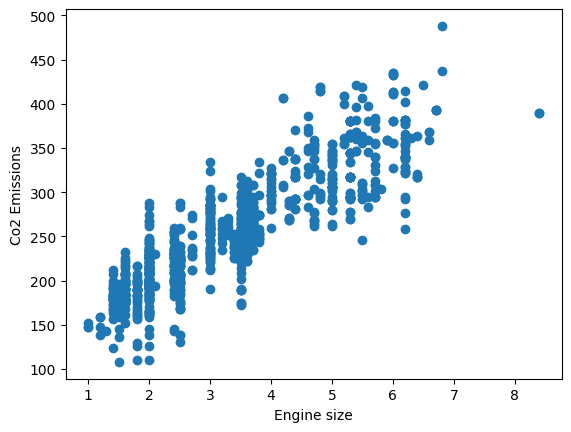

In [ ]:
#Check scatter plot
import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Co2 Emissions")
plt.show()

**Data Splitting**

In [ ]:
import numpy as np

msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

### Comparison Between All The Regression

`https://drive.google.com/file/d/18i_2sl5egna9zAIletmsY4PIfWu-A7Ux/view?usp=sharing`

#### Polynomial Regression

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Note: The equation can get from LaTex
* generate online: https://latex.codecogs.com/eqneditor/editor.php

##### ENGINESIZE vs CO2EMISSION

In [ ]:
#importing polynomial function from sklearn library
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

####Training the model#####

#convert dataframe into arrrays
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#poly = PolynomialFeatures(degree=2)
#poly = PolynomialFeatures() #if you don't want to mention the degree the default is 2
#if the higher the degree the curvier the line (as it will following the data distribution)
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf.fit(train_x_poly, train_y)

#Prediction
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  77.06220378695838
The MSE is:  924.5089924800563


Text(0, 0.5, 'Emission')

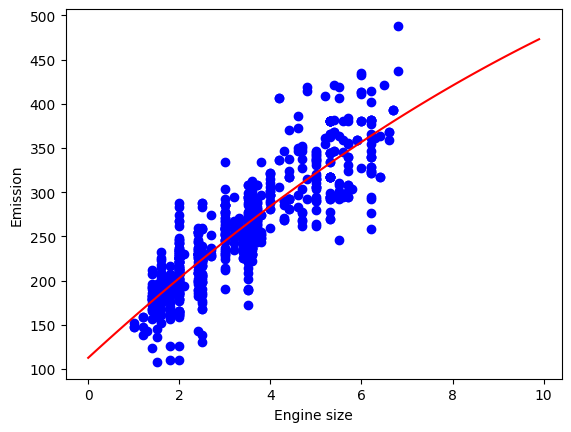

In [ ]:
#Equation for polynomial degree=2
#Noticed the curved line

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
####Training the model#####
###Changing the degree of the polymonial

#poly = PolynomialFeatures(degree=2)
#poly = PolynomialFeatures() #if you don't want to mention the degree the default is 2
#if the higher the degree the curvier the line (as it will following the data distribution)
poly4 = PolynomialFeatures(degree=4)
train_x_poly4 = poly4.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf4 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf4.fit(train_x_poly4, train_y)

#Prediction
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly4 = poly4.fit_transform(test_x)
test_y_ = clf4.predict(test_x_poly4)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  77.07015503340551
The MSE is:  924.1885171051108


Text(0, 0.5, 'Emission')

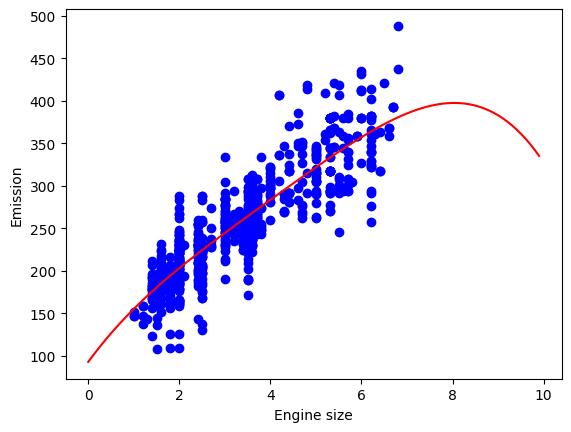

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
poly12 = PolynomialFeatures(degree=5)
train_x_poly12 = poly12.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf12 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf12.fit(train_x_poly12, train_y)

#Prediction
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly12 = poly12.fit_transform(test_x)
test_y_ = clf12.predict(test_x_poly12)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  77.5197785757815
The MSE is:  906.0664183517445


Text(0, 0.5, 'Emission')

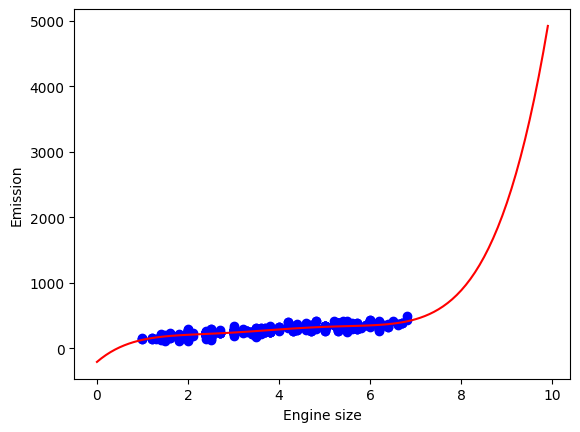

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf12.intercept_[0]+ clf12.coef_[0][1]*XX + clf12.coef_[0][2]*np.power(XX, 2) + clf12.coef_[0][3]*np.power(XX, 3) + clf12.coef_[0][4]*np.power(XX, 4)  + clf12.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

##### Note From Anis

In [ ]:
#NOTE FROM ANIS:
'''
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
'''
# This line generates an array of evenly spaced values from 0.0 to 10.0 with a step of 0.1.
# These values will be used as input for generating the predicted CO2 emissions.
'''
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)

'''
# This line calculates the predicted CO2 emissions (yy) using the fitted polynomial regression model (clf4).
# It uses the coefficients of the model (clf4.intercept_ and clf4.coef_) and the input values (XX) to calculate the predicted values.
'''

plt.plot(XX, yy, '-r' )

'''
# This line plots the predicted CO2 emissions (yy) against the input values (XX) as a red line.
# This line represents the fitted polynomial regression curve.
'''
plt.xlabel("Engine size")
plt.ylabel("Emission")'''

'\nplt.xlabel("Engine size")\nplt.ylabel("Emission")'

##### FUELCOMSUMPTION_COMB_MPG Vs CO2EMISSION

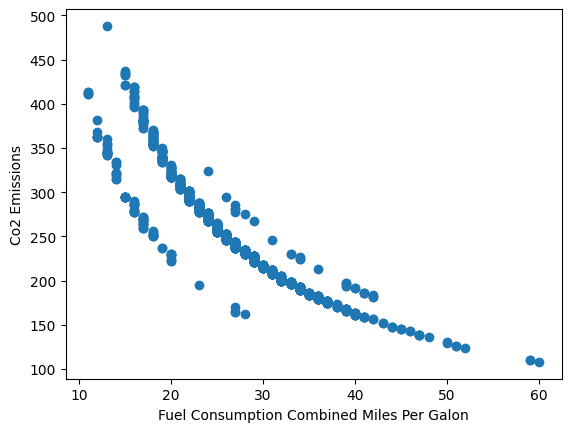

In [ ]:
#Check scatter plot
import matplotlib.pyplot as plt

plt.scatter(df.FUELCONSUMPTION_COMB_MPG	, df.CO2EMISSIONS)
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Co2 Emissions")
plt.show()

The R2 Score is:  84.15884397546034
The MSE is:  623.7218118124703


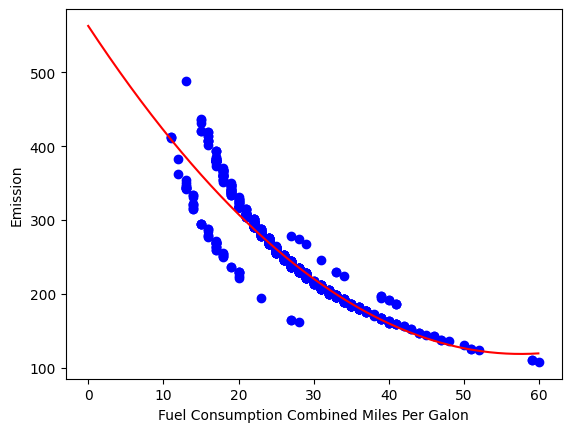

In [ ]:
# prompt: using polynomial regression, create the best fitted line for the scatter plot above

# Train the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)

# Prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

# Evaluation
print('The R2 Score is: ', (r2_score(test_y, test_y_)) * 100)
print('The MSE is: ', np.mean((test_y_ - test_y) ** 2))

# Plot the best fitted line
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Emission")
plt.show()


In [ ]:
poly6 = PolynomialFeatures(degree=3)
train_x_poly6 = poly6.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf6 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf6.fit(train_x_poly6, train_y)

#Prediction
test_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly6 = poly6.fit_transform(test_x)
test_y_ = clf6.predict(test_x_poly6)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  85.57367088313657
The MSE is:  581.4538970153554


Text(0, 0.5, 'Emission')

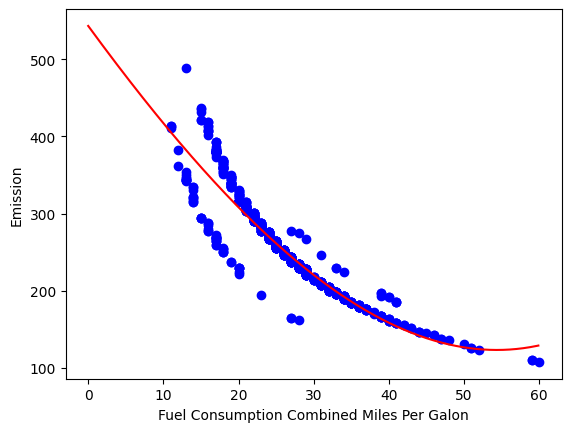

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf6.intercept_[0]+ clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2) + clf6.coef_[0][3]*np.power(XX, 3)
#lagi tinggi degree, lagi panjang equation
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Emission")

In [ ]:
poly7 = PolynomialFeatures(degree=4)
train_x_poly7 = poly7.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf7 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf7.fit(train_x_poly7, train_y)

#Prediction
test_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly7 = poly7.fit_transform(test_x)
test_y_ = clf7.predict(test_x_poly7)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  86.07962391191275
The MSE is:  561.061435571734


Text(0, 0.5, 'Emission')

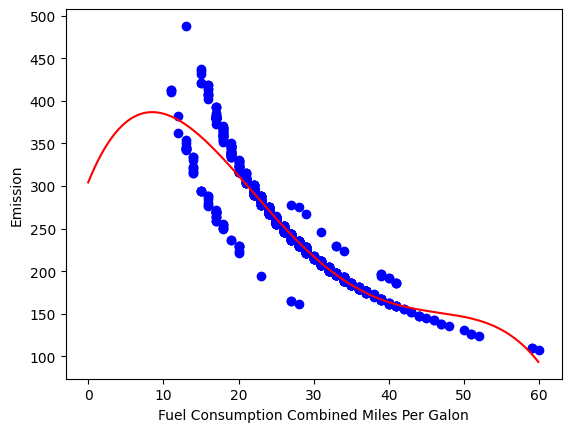

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf7.intercept_[0]+ clf7.coef_[0][1]*XX + clf7.coef_[0][2]*np.power(XX, 2) + clf7.coef_[0][3]*np.power(XX, 3) + clf7.coef_[0][4]*np.power(XX, 4)
#lagi tinggi degree, lagi panjang equation
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Emission")

In [ ]:
poly8 = PolynomialFeatures(degree=5)
train_x_poly8 = poly8.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf8 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf8.fit(train_x_poly8, train_y)

#Prediction
test_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly8 = poly8.fit_transform(test_x)
test_y_ = clf8.predict(test_x_poly8)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  86.23931713112178
The MSE is:  554.6249926011191


Text(0, 0.5, 'Emission')

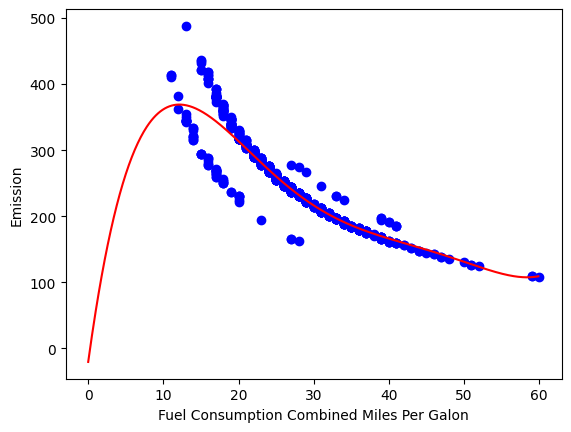

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf8.intercept_[0]+ clf8.coef_[0][1]*XX + clf8.coef_[0][2]*np.power(XX, 2) + clf8.coef_[0][3]*np.power(XX, 3) + clf8.coef_[0][4]*np.power(XX, 4) + clf8.coef_[0][5]*np.power(XX, 5)
#lagi tinggi degree, lagi panjang equation
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Emission")

In [ ]:
poly9 = PolynomialFeatures(degree=6)
train_x_poly9 = poly9.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf9 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf9.fit(train_x_poly9, train_y)

#Prediction
test_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly9 = poly9.fit_transform(test_x)
test_y_ = clf9.predict(test_x_poly9)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  86.26718844258626
The MSE is:  553.5016380363732


Text(0, 0.5, 'Emission')

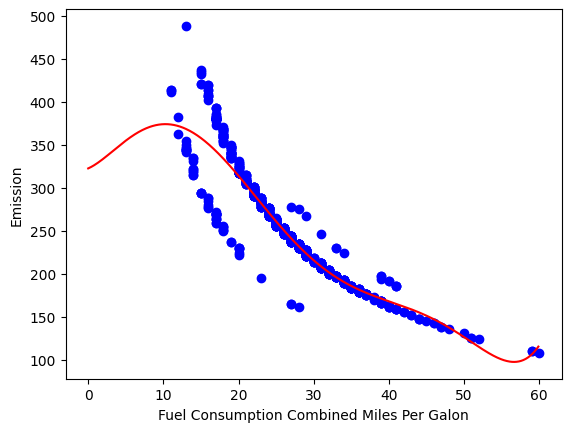

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf9.intercept_[0]+ clf9.coef_[0][1]*XX + clf9.coef_[0][2]*np.power(XX, 2) + clf9.coef_[0][3]*np.power(XX, 3) + clf9.coef_[0][4]*np.power(XX, 4) + clf9.coef_[0][5]*np.power(XX, 5) + clf9.coef_[0][6]*np.power(XX, 6)
#lagi tinggi degree, lagi panjang equation
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Emission")

In [ ]:
poly10 = PolynomialFeatures(degree=7)
train_x_poly10 = poly10.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf10 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf10.fit(train_x_poly10, train_y)

#Prediction
test_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly10 = poly10.fit_transform(test_x)
test_y_ = clf10.predict(test_x_poly10)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  86.36852996484568
The MSE is:  549.4170630506048


Text(0, 0.5, 'Emission')

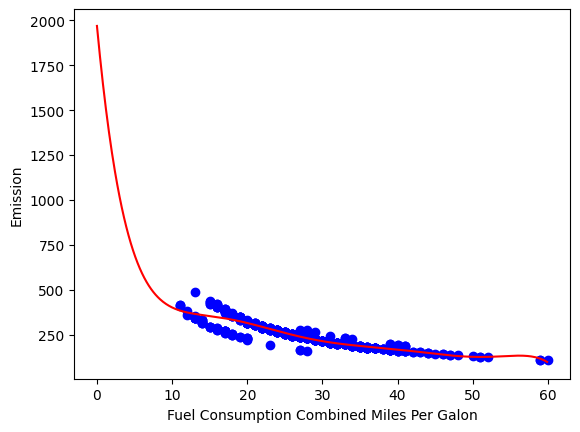

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf10.intercept_[0]+ clf10.coef_[0][1]*XX + clf10.coef_[0][2]*np.power(XX, 2) + clf10.coef_[0][3]*np.power(XX, 3) + clf10.coef_[0][4]*np.power(XX, 4) + clf10.coef_[0][5]*np.power(XX, 5) + clf10.coef_[0][6]*np.power(XX, 6) + clf10.coef_[0][7]*np.power(XX, 7)
#lagi tinggi degree, lagi panjang equation
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Emission")

In [ ]:
poly11 = PolynomialFeatures(degree=8)
train_x_poly11 = poly11.fit_transform(train_x)
#clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
clf11 = linear_model.LinearRegression() # clf is the trained linear regression model on polynomial features
train_y_ = clf11.fit(train_x_poly11, train_y)

#Prediction
test_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x_poly11 = poly11.fit_transform(test_x)
test_y_ = clf11.predict(test_x_poly11)  #test_y_ (test Y hat or ŷ)

#Evaluation
from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  86.30578129479424
The MSE is:  551.9461512502694


Text(0, 0.5, 'Emission')

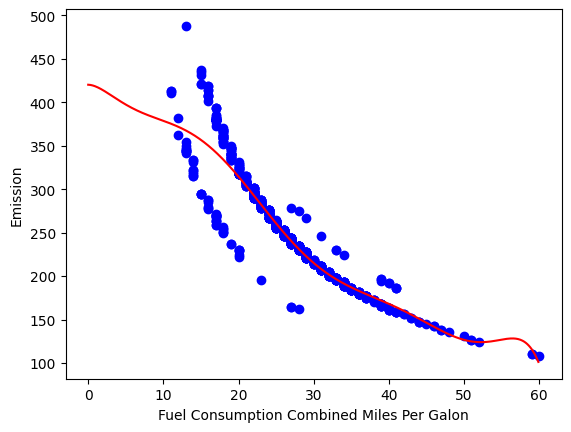

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf11.intercept_[0]+ clf11.coef_[0][1]*XX + clf11.coef_[0][2]*np.power(XX, 2) + clf11.coef_[0][3]*np.power(XX, 3) + clf11.coef_[0][4]*np.power(XX, 4) + clf11.coef_[0][5]*np.power(XX, 5) + clf11.coef_[0][6]*np.power(XX, 6) + clf11.coef_[0][7]*np.power(XX, 7) + clf11.coef_[0][8]*np.power(XX, 8)
#lagi tinggi degree, lagi panjang equation
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Combined Miles Per Galon")
plt.ylabel("Emission")

In [ ]:
# prompt: conclude all the analysis above and  which is the best fitted model?

# Conclusion:

# We explored polynomial regression to model the relationship between features like engine size and fuel consumption with CO2 emissions.
# By increasing the degree of the polynomial, we observed how the model fit the training data more closely.
# However, higher degrees can lead to overfitting, where the model performs well on training data but poorly on unseen data.

# Best Fitted Model:

# It's difficult to definitively say which model is "best" without evaluating them on a separate validation or test set.
# However, based on the R2 scores and MSE values, the polynomial regression model with a degree of 7 or 8 for 'FUELCONSUMPTION_COMB_MPG' seems to provide a good balance between fit and complexity.

# Further Steps:

# To rigorously determine the best model, we should:
# 1. Split the data into training, validation, and test sets.
# 2. Train models on the training set.
# 3. Evaluate performance on the validation set to tune hyperparameters (like polynomial degree).
# 4. Finally, assess the chosen model's generalization ability on the held-out test set.


##### Multiple Non-linear Regression

In [ ]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
# Train the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY',
                               'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly15 = PolynomialFeatures(degree=2)  # Adjust the degree as needed
train_x_poly15 = poly15.fit_transform(train_x)
clf15 = linear_model.LinearRegression()
clf15.fit(train_x_poly15, train_y)

# Prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY',
                               'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly15 = poly15.fit_transform(test_x)
test_y_ = clf15.predict(test_x_poly15)

# Evaluation
print('The R2 Score is: ', (r2_score(test_y, test_y_)) * 100)
print('The MSE is: ', np.mean((test_y_ - test_y) ** 2))

The R2 Score is:  89.67550544502863
The MSE is:  406.5115222587965


In [ ]:
# Train the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY',
                               'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly15 = PolynomialFeatures(degree=2)  # Adjust the degree as needed
train_x_poly15 = poly15.fit_transform(train_x)
clf15 = linear_model.LinearRegression()
clf15.fit(train_x_poly15, train_y)

# Prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY',
                               'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly15 = poly15.fit_transform(test_x)
test_y_ = clf15.predict(test_x_poly15)

# Evaluation
print('The R2 Score is: ', (r2_score(test_y, test_y_)) * 100)
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2 Score is:  89.67550544502863
The MSE is:  40651.15
The MAE is:  1183.87


In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Conclusion:**

* Based on the provided code and evaluations, it's challenging to definitively declare a single "best" predicting model without a more rigorous evaluation process.

* However, considering the R2 scores and MSE values, the polynomial regression models with higher degrees (around 7 or 8) for 'FUELCONSUMPTION_COMB_MPG' seem to demonstrate a good balance between fitting the training data and potential generalization to unseen data.

* The multiple non-linear regression model also shows promising results. It incorporates multiple features and achieves a high R2 score, indicating a good fit to the training data.

**Recommendations:**

* To make a more informed decision about the best model, I recommend:

1. Splitting the data into training, validation, and test sets. This allows for proper model evaluation and hyperparameter tuning.
2. Performing cross-validation on the training set to assess model stability and generalization.
3. Comparing the performance of different models (including polynomial regression with varying degrees and multiple non-linear regression) on the validation set.
4. Selecting the model with the best performance on the validation set and evaluating its final performance on the held-out test set.

* By following these steps, you can confidently identify the model that best predicts CO2 emissions based on the available features.